### Introduction

In the following notebook, I will be conducting a market analysis where I intend to look into the following:
- What was the loss in revenue due to COVID19? Where do you expect losses to be for the San Francisco are to be by the end of the year?
- How does the long term rental market compare to the of the tourist industry?
    - Which is more profitable? Is there evidence to suggest Airbnb should consider entering the rental housing market
    - Who are our most profitable hosts? Are people using Airbnb as a business or 

**Read in libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set notebook preferences**

In [2]:
#Set pandas preferences
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.options.display.float_format = '{:.2f}'.format

#Set visualization preferences
plt.style.use('Solarize_Light2')

#Set path to save visualizations
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Visualizations\Modeling'

**Read in data**

In [3]:
#Set path to local machine
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\02_Cleaned'

#Read in file
df = pd.read_csv(path + '/2020_0715_Listings_Cleaned.csv', index_col=['last_review'],
                parse_dates=['last_review'])

#Sort data
df.sort_values('last_review', inplace = True)

### Data Overview

**Preview Data**

In [4]:
#Display data, print shape
print('Data shape:', df.shape)
display(df.head(3))

Data shape: (126258, 47)


,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_name,host_response_rate,host_response_time,host_verifications,id,instant_bookable,is_location_exact,latitude,longitude,maximum_nights,minimum_nights,monthly_price,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,weekly_price,zipcode
last_review,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-01,1,"Wifi,Kitchen, Free street parking , Hot tub ,...",21,335,30,60,1.0,Real Bed,1.0,1.0,4,NaN,NaN,moderate,San Francisco,30.0,0.0,1,1.0,73070632,0.0,0.0,Tina,87.0,within a few hours,"email , phone , reviews , jumio , offlin...",18546459,0,1,37.710475,-122.449333,1125,6,NaN,Outer Mission,7,45.0,Condominium,0,0,1,97.0,0.57,Private room,100.0,NaN,94112.0
2018-07-01,2,"TV, Cable TV ,Wifi,Kitchen, Free parking on p...",0,324,19,49,1.0,Real Bed,1.0,1.0,33,NaN,NaN,strict 14 with grace period,San Francisco,200.0,0.0,1,1.0,13832870,0.0,0.0,International,2.0,within an hour,"phone , reviews , jumio , offline governm...",18874655,0,1,37.802900,-122.419981,1125,30,NaN,Russian Hill,2,148.0,Apartment,0,0,1,100.0,0.18,Entire home/apt,1500.0,NaN,94133.0
2018-07-01,2,"TV, Cable TV ,Wifi,Kitchen, Free parking on p...",29,364,59,89,1.0,Real Bed,1.0,1.0,32,NaN,NaN,strict 14 with grace period,San Francisco,200.0,0.0,1,1.0,13832870,0.0,0.0,International,96.0,within a few hours,"phone , reviews , jumio , offline governm...",18874655,0,1,37.802900,-122.419981,1125,30,NaN,Russian Hill,2,144.0,Apartment,0,0,1,100.0,0.24,Entire home/apt,1500.0,NaN,94133.0


# What was the loss in revenue due to COVID19? Where do you expect losses to be for the San Francisco are to be by the end of the year?

**Prepare Data**

In [5]:
#Get daily gross rental income
daily_gross = df.groupby('last_review')['price'].sum()

#Get daily gross rental income
daily_rentals = df.groupby('last_review')['price'].count()

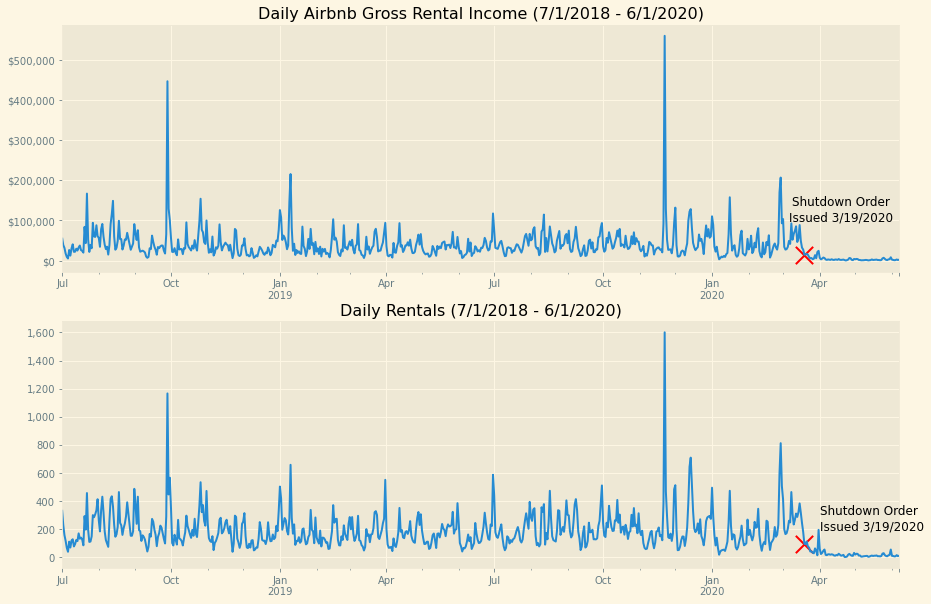

In [6]:
#Create fig
f, ax = plt.subplots(2,1,figsize = (15,10))

#Plot total revenue each day
daily_gross.plot(ax=ax[0])
ax[0].scatter('2020-03-19', 14443, color = 'red',  marker='x',s=300,  edgecolors='black',
)

#Set plot aesthetics
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax[0].set_xlabel('')
ax[0].set_title('Daily Airbnb Gross Rental Income (7/1/2018 - 6/1/2020)')
ax[0].text('2020-04-19', 100_000, 'Shutdown Order\nIssued 3/19/2020', fontsize=12,horizontalalignment='center',);


#Plot total revenue each day
daily_rentals.plot(ax=ax[1])

#Add text for Shut down
X='2020-03-19'
Y = daily_rentals.iloc[daily_rentals.index == '2020-03-19']
ax[1].scatter(X,Y, color = 'red',  marker='x',s=300,  edgecolors='black')

#Set plot aesthetics
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[1].set_xlabel('')
ax[1].set_title('Daily Rentals (7/1/2018 - 6/1/2020)')

ax[1].text('2020-04-01' ,Y + 100, 'Shutdown Order\nIssued 3/19/2020', fontsize=12,horizontalalignment='left',);

#Stay at home order March 19 2020

**Comparing 2019 to 2020 (3/19 - 6/7)

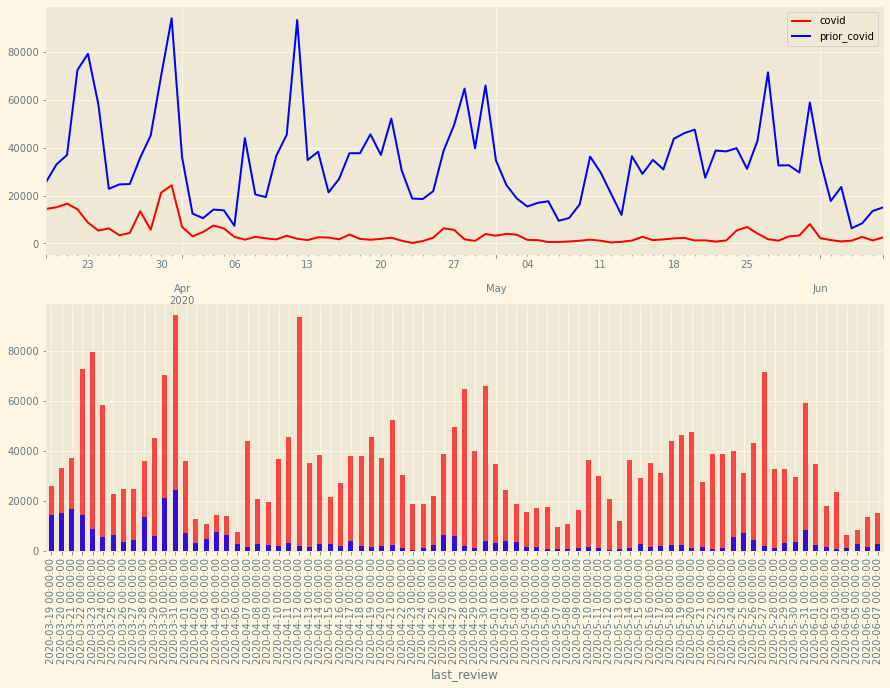

In [7]:
covid = daily_gross.iloc[627:]
prior_covid = daily_gross.iloc[261:342]

covid_comparison = pd.DataFrame({'covid': covid, 'prior_covid': prior_covid.values})

f, ax = plt.subplots(2,1, figsize = (15,10))

covid_comparison.plot(ax=ax[0], color = ['red','blue'])

covid_comparison.prior_covid.plot(kind = 'bar', ax=ax[1], color = 'r', alpha = .7)
covid_comparison.covid.plot(kind = 'bar', ax=ax[1], color ='b',alpha = .8)

In [8]:
total_loss = np.sum(covid_comparison.covid) - np.sum(covid_comparison.prior_covid)
percent_loss = (np.sum(covid_comparison.covid) - np.sum(covid_comparison.prior_covid))/np.sum(covid_comparison.prior_covid) * 100

print(percent_loss)

-88.21051499127525


Extrappolating 88% loss through end of q2(assuming no changes to lockdown), what do Q2 losses look like? What if trend continues through Q3 and 4?

In [9]:
Q2_stats = pd.DataFrame(index=np.arange(np.datetime64('2020-04-01'), np.datetime64('2020-07-01')))

Q2_stats['2020_Q2'] = daily_gross.iloc[640:]
Q2_stats['2019_Q2'] = daily_gross.iloc[274:365].values
Q2_stats.fillna(np.mean(Q2_stats['2020_Q2']), inplace = True)

Q2_loss = np.sum(Q2_stats['2020_Q2'] - Q2_stats['2019_Q2'])
print(Q2_loss)
Q2_percent_loss = np.sum(Q2_stats['2020_Q2'] - Q2_stats['2019_Q2'])/np.sum(Q2_stats['2019_Q2'])

Q2_percent_loss # fill NA with mean

-2732745.44117647


-0.922760313617966

In [13]:
Q2_stats.reset_index(inplace= True)

In [18]:
Q2_stats[['year','month_day']] = Q2_stats['index'].astype(str).str.split('-',1,expand=True)

Q2_stats.set_index('month_day')

Q2_stats.drop(['year', 'index'], inplace = True, axis =1)

In [21]:
Q2_stats.set_index('month_day', inplace = True)

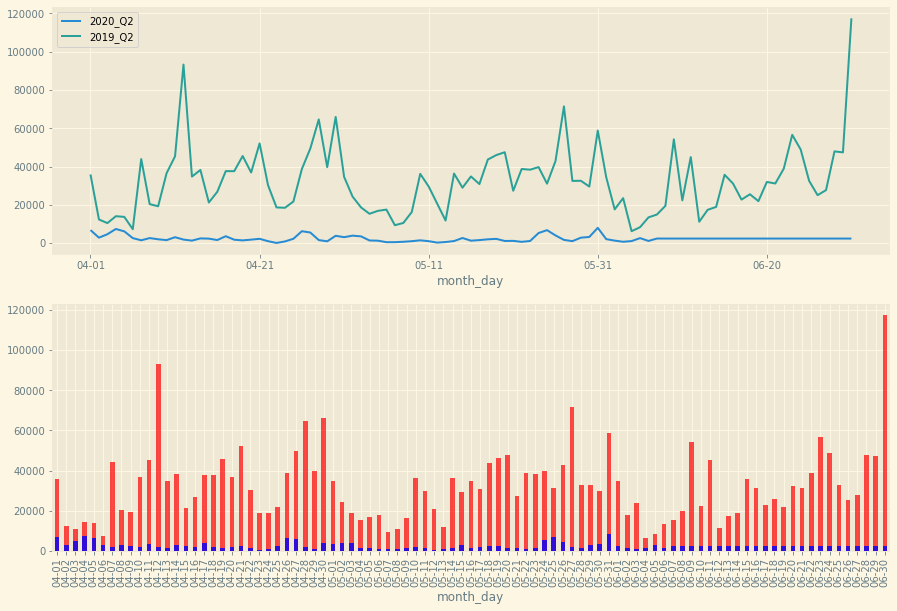

In [22]:

f, ax = plt.subplots(2,1, figsize = (15,10))

Q2_stats['2019_Q2'].plot(kind = 'bar', ax=ax[1], color = 'r', alpha = .7)
Q2_stats['2020_Q2'].plot(kind = 'bar', ax=ax[1], color ='b',alpha = .8)
Q2_stats.plot(ax=ax[0])

**Q3 Losses if 92% loss continues**

In [ ]:
Q3_2019 = daily_gross.iloc[374:457].reset_index()
Q3_2019['projected_income'] = Q3_2019.price + (Q3_2019.price * Q2_percent_loss)



In [ ]:
Q3_loss = np.sum(Q3_2019['projected_income']) - np.sum(Q3_2019['price'])
Q3_loss

In [ ]:
f, ax = plt.subplots(2,1, figsize = (15,10))

Q3_2019.set_index('last_review', inplace = True)

Q3_2019.plot(ax=ax[0], marker = 'o', markersize = 2.5)

Q2_stats['2019_Q2'].plot(kind = 'bar', ax=ax[1], color = 'r', alpha = .7)
Q2_stats['2020_Q2'].plot(kind = 'bar', ax=ax[1], color ='b',alpha = .8)



Wednesday, July 1
and ends on
Wednesday, September 30

* Take mean of what he have in Q2 and add it at the end.
* Calculate % difference 
* Use this % to predict Q3 (reiterate lack of data)


we can also do apples to apples comparison to last year(when covide started) and calculate direct loss from covid. If trend continues, her'ews what we can lose in Q3 and Q4(worst case scenario)

### Exploring Airbnb Ownership

**Which hosts own the most Airbnb listings on the platform? Which hosts are the most popular(meaning, who has the most rented listings total)?**
- Which of these owners are renting out the entire home/apartment properties?
- What kinds of properties are these and how do they compare to other hosts
- Are these hosts also Super Hosts?

**Which hosts own the most Airbnb listings on the platform? Which hosts are the most popular(meaning, who has the most rented listings total)?**

In [ ]:
#Create dataframe that contains id, name, # of listings, #of properties,  gross income, and super host flag for each renter
host_metrics = pd.DataFrame(df.groupby(['host_id','host_name'])['id'].agg(total_listings = 'count'))
host_metrics['properties'] = df.groupby(['host_id','host_name'])['id'].nunique().values#,'unique_listings':pd.Series.nunique})
host_metrics['gross_income'] = df.groupby(['host_id','host_name'])['price'].sum().values
host_metrics['superhost?'] = df.groupby(['host_id','host_name'])['host_is_superhost'].sum().values
host_metrics['superhost?'] = host_metrics['superhost?'].apply(lambda x: False if x == 0 else True)
host_metrics['avg_monthly_bookings'] = host_metrics['total_listings']/24

#Tidy cols
host_metrics.sort_values(by = 'properties',ascending = False,inplace = True)
host_metrics = host_metrics.reindex(sorted(host_metrics.columns), axis=1)

#Check
display(host_metrics.head(10))

**Who are these hosts?**

7 of the top 10 property holders on Airbnb in SF are hotels or fully-furnished rental comanies(for short and long-term rent). These incluse:
- Zeus(furnished home living)
- Sonder(furnished rental)
- Landmark(hotel)
- Stratford(hotel)
- The Bartlett(hotel)
- Blueground(fully furnished apartments)

**What kinds of properties do the top hosts have?**


**What do we know about these hosts?**

** What kinds of properties do the top of the top have and how many?**

**What % of the total revenue are these people responsible for?**

- What kinds of properties are these and how do they compare to other hosts

**Check price distribution w/ and w/o outliers